In [259]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)

city_data.head()

# Combine the data into a single dataset

# Display the data table for preview


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [260]:
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.describe()

combined_cityride_df = pd.merge(city_data, ride_data, how="outer", on="city")
#combined_cityride_df.head()
combined_cityride_df = combined_cityride_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
combined_cityride_df = combined_cityride_df.rename(columns={"city": "City", "date": "Date", "fare":"Fare",
                                                            "ride_id": "Ride ID", "driver_count": "Driver Count",
                                                            "type": "Type"})




In [302]:
combined_cityride_df.head()

,City,Date,Fare,Ride ID,Driver Count,Type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [263]:
#combined_cityride2_df = combined_cityride_df.groupby("City")

In [264]:
#combined_mean = combined_cityride2_df["Fare"].mean()
#combined_mean = pd.to_numeric(combined_mean)
#combined_mean.head()

In [265]:
#combined_counts = combined_cityride2_df["Type"].count()
#combined_counts2 = combined_cityride2_df["Type"].value_counts()
#combined_counts2.head()

In [283]:
#combine3_df = combined_cityride_df.groupby("Type")
#c3fares = combine3_df["Fare"].sum()
#Test area for Pie Charts
Urban_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] == "Urban") & 
                                            (combined_cityride_df["Type"] != "Suburban") & 
                                            (combined_cityride_df["Type"] != "Rural")] 
USum23 = Urban_variable23["Driver Count"].sum()
USum23


59602

In [303]:
Sub_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] != "Urban") & 
                                            (combined_cityride_df["Type"] == "Suburban") & 
                                            (combined_cityride_df["Type"] != "Rural")] 
SSum23 = Sub_variable23["Driver Count"].sum()
SSum23

625

In [304]:
Rural_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] != "Urban") & 
                                            (combined_cityride_df["Type"] != "Suburban") & 
                                            (combined_cityride_df["Type"] == "Rural")] 
RSum23 = Rural_variable23["Driver Count"].sum()
RSum23

125

In [286]:
Totalsum23 = RSum23 + SSum23 + USum23
Totalsum23

68709

In [287]:
USum23/Totalsum23

0.8674555007349838

## Bubble Plot of Ride Sharing Data

In [46]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [89]:
#combined_cityride2_df.plot(kind="scatter", x=combined_counts2, y=combined_mean , grid=True, figsize=(20,10),title="Pyber Ride Sharing Data 2016")
#plt.show()
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s="Driver Count", alpha=0.75)

IndentationError: unexpected indent (<ipython-input-89-25eafba92ec4>, line 4)

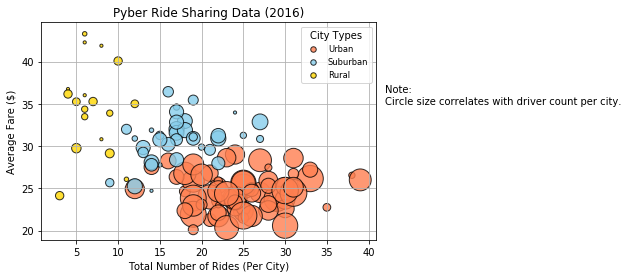

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


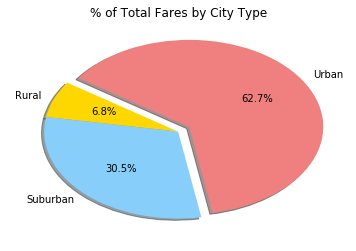

<Figure size 432x288 with 0 Axes>

In [153]:
Urban_variable = combined_cityride_df.loc[combined_cityride_df["Type"] == "Urban", :]
USum = Urban_variable["Fare"].sum()
#USum commented out because it was tested, not needed after, applies to all comments to follow

Sub_variable = combined_cityride_df.loc[combined_cityride_df["Type"] == "Suburban", :]
SSum = Sub_variable["Fare"].sum()
#SSum

Rural_variable = combined_cityride_df.loc[combined_cityride_df["Type"] == "Rural", :]
RSum = Rural_variable["Fare"].sum()
#RSum

Totalsum = RSum + SSum + USum
#Totalsum

Upercent = USum / Totalsum
Spercent = SSum / Totalsum
Rpercent = RSum / Totalsum
#[Upercent, Spercent, Rpercent]


city_types = ["Urban", "Rural", "Suburban"]
percents = [Upercent, Rpercent, Spercent]
colors = ["lightcoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type")
plt.pie(percents, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
#plt.axis("equal")
plt.show()
plt.savefig("../Images/Citypercents.png")








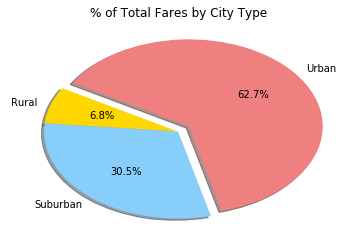

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

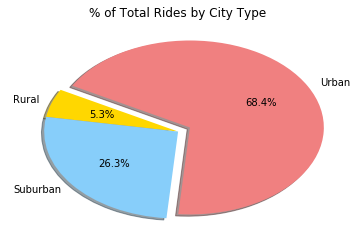

<Figure size 432x288 with 0 Axes>

In [154]:
Urban_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Urban", :]
USum2 = Urban_variable2["Type"].count()
#USum2

Sub_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Suburban", :]
SSum2 = Sub_variable2["Type"].count()
#SSum2

Rural_variable2 = combined_cityride_df.loc[combined_cityride_df["Type"] == "Rural", :]
RSum2 = Rural_variable2["Type"].count()
#RSum2

Totalsum2 = RSum2 + SSum2 + USum2
#Totalsum2

Upercent2 = USum2 / Totalsum2
Spercent2 = SSum2 / Totalsum2
Rpercent2 = RSum2 / Totalsum2
#[Upercent2, Spercent2, Rpercent2]


city_types = ["Urban", "Rural", "Suburban"]
percents = [Upercent2, Rpercent2, Spercent2]
colors = ["lightcoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.title("% of Total Rides by City Type")
plt.pie(percents, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=265)
#plt.axis("equal")
plt.show()
plt.savefig("../Images/Ridespercents.png")



In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


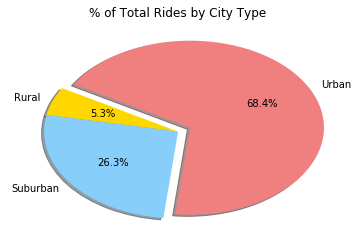

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

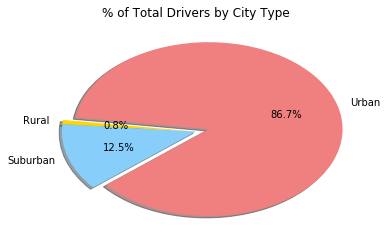

<Figure size 432x288 with 0 Axes>

In [293]:
Urban_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] == "Urban") & 
                                            (combined_cityride_df["Type"] != "Suburban") & 
                                            (combined_cityride_df["Type"] != "Rural")] 
USum23 = Urban_variable23["Driver Count"].sum()
#USum23

Sub_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] != "Urban") & 
                                            (combined_cityride_df["Type"] == "Suburban") & 
                                            (combined_cityride_df["Type"] != "Rural")] 
SSum23 = Sub_variable23["Driver Count"].sum()
#SSum23

Rural_variable23 = combined_cityride_df.loc[(combined_cityride_df["Type"] != "Urban") & 
                                            (combined_cityride_df["Type"] != "Suburban") & 
                                            (combined_cityride_df["Type"] == "Rural")] 
RSum23 = Rural_variable23["Driver Count"].sum()
#RSum23


Totalsum23 = RSum23 + SSum23 + USum23
#Totalsum23


Upercent23 = USum23 / Totalsum23
Spercent23 = SSum23 / Totalsum23
Rpercent23 = RSum23 / Totalsum23
#[Upercent23, Spercent23, Rpercent23]


city_types = ["Urban", "Rural", "Suburban"]
percents = [Upercent23, Rpercent23, Spercent23]
colors = ["lightcoral", "Gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.title("% of Total Drivers by City Type")
plt.pie(percents, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
#plt.axis("equal")
plt.show()
plt.savefig("../Images/Driverpercents.png")













In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


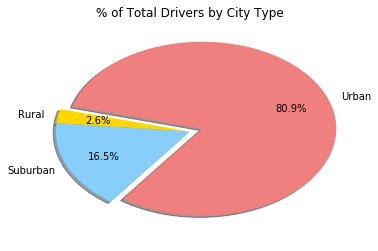

In [6]:
# Show Figure
plt.show()